# Study on Wireless Power Transfer with LC-L Circuit #

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import sin, pi, cos, MatrixSymbol, Matrix, exp,oo
import math
import matplotlib.pyplot as plt
import modsym as sb
import pandas as pd

In [61]:
L1,L2,R1,R2,RS,RL= sp.symbols('L_1,L_2,R_1,R_2,R_S,R_L',real=True,positive=True) 
u,i1,i2,M,t = sp.symbols('u,i_1,i_2,M,t',positive=True,real=True) 
omega,delta = sp.symbols('omega,Delta',positive =True,real=True) 
s = sp.Symbol('s')
t,f = sp.symbols('t,f')
i2pi = sp.I*2*sp.pi

## 2.1. Wireless Power Transfer Circuit Topologies ##
<img align=center src="https://github.com/hydekage/WPT-BASIC/blob/master/img/circuit.png?raw=true" width=50% height=50% align="Center">

### 2.2 System Model ### 
First, we wrote a parameter symbol for the WPT circuit which is $R_S,R_1,L_1,M$ and $R_L,R_2,L_2$ using KCL & KVL form as: 

Loop 1 (Voltage Law):
Primary Circuit:
$$u = {i_1}{R_S}+{L_1}{\frac{di_1}{dt}}+{M}{\frac{di_2}{dt}}$$
Secondary Circuit:
$$0 = {i_2}{R_L}+{i_2}{R_L}+{L_1}{\frac{di_2}{dt}}+{M}{\frac{di_1}{dt}}$$
Loop 2 (Current Law):
in sympy equations, we should treat the equations as follow (ex): 
$$variable_{name} = u-{i_1}{R_S}-{i_1}{R_S}-{L_1}{\frac{di_1}{dt}}-{M}{\frac{di_2}{dt}}$$

In [82]:
i1d = (sp.Function('i_1')(t).diff(t))
i2d = (sp.Function('i_2')(t).diff(t))
eq1 = u-i1*RS-i1*R1-(L1*i1d+M*i2d)
eq2 = -(L2*i2d+M*i1d)-(i2*R2)-(i2*RL)
display('KVL Primary:',eq1,'KVL Secondary:',eq2)

'KVL Primary:'

-L_1*Derivative(i_1(t), t) - M*Derivative(i_2(t), t) - R_1*i_1 - R_S*i_1 + u

'KVL Secondary:'

-L_2*Derivative(i_2(t), t) - M*Derivative(i_1(t), t) - R_2*i_2 - R_L*i_2

In the Wireless Power Transfer(WPT) circuit, find the state space variables and afterwards we will obtain matrix A and B in the state space equation. Therefore, we need to define the matrix A and B using below operation in sympy. the equation:
$$x ̇=Ax+Bu$$
$$y=Cx+Du$$  
define the WPT state space equation as:
$$
\begin{bmatrix}
\frac{dv_1}{dt}\\
\frac{di_1}{dt}\\
\frac{di_2}{dt}\\
\end{bmatrix}
= A
\begin{bmatrix}
i_1\\
i_2\\
\end{bmatrix}
+ B
u
$$

$$
y = 
C
\begin{bmatrix}
i_1\\
i_2\\
\end{bmatrix}+ Du
$$

In [63]:
sol = sp.solve((eq1,eq2),(i1d,i2d),Dict=True)
soli1d = sb.named_expression(r'\frac{di_1}{dt}',sol[i1d])
display(soli1d.as_eq())
soli2d = sb.named_expression(r'\frac{di_2}{dt}',sol[i2d])
display(soli2d.as_eq())

Eq(\frac{di_1}{dt}, (-L_2*R_1*i_1 - L_2*R_S*i_1 + L_2*u + M*R_2*i_2 + M*R_L*i_2)/(L_1*L_2 - M**2))

Eq(\frac{di_2}{dt}, (-L_1*R_2*i_2 - L_1*R_L*i_2 + M*R_1*i_1 + M*R_S*i_1 - M*u)/(L_1*L_2 - M**2))

In [64]:
di1dt = sp.poly(soli1d,(i1,i2,u)).as_dict()
di2dt = sp.poly(soli2d,(i1,i2,u)).as_dict()
print(di1dt,"\n\n",di2dt,"\n\n")
print(di1dt[1,0,0])
print(len(di1dt))

{(0, 0, 1): L_2/(L_1*L_2 - M**2), (0, 1, 0): (M*R_2 + M*R_L)/(L_1*L_2 - M**2), (1, 0, 0): (-L_2*R_1 - L_2*R_S)/(L_1*L_2 - M**2)} 

 {(0, 0, 1): -M/(L_1*L_2 - M**2), (0, 1, 0): (-L_1*R_2 - L_1*R_L)/(L_1*L_2 - M**2), (1, 0, 0): (M*R_1 + M*R_S)/(L_1*L_2 - M**2)} 


(-L_2*R_1 - L_2*R_S)/(L_1*L_2 - M**2)
3


### 2.2.1 State Space Matrix definition: ###

In [65]:
A_Row_1 = (di1dt[1,0,0],di1dt[0,1,0])
A_Row_2 = (di2dt[1,0,0],di2dt[0,1,0])
A  = Matrix([A_Row_1,A_Row_2])
display('A:',A)
B_Row_1 = (di1dt[0,0,1])
B_Row_2 = (di2dt[0,0,1])
B = Matrix([B_Row_1,B_Row_2])
display('B:',B)

'A:'

Matrix([
[(-L_2*R_1 - L_2*R_S)/(L_1*L_2 - M**2),      (M*R_2 + M*R_L)/(L_1*L_2 - M**2)],
[     (M*R_1 + M*R_S)/(L_1*L_2 - M**2), (-L_1*R_2 - L_1*R_L)/(L_1*L_2 - M**2)]])

'B:'

Matrix([
[L_2/(L_1*L_2 - M**2)],
[ -M/(L_1*L_2 - M**2)]])

In [66]:
CL = Matrix([[0,-RL]])
CS = Matrix([[-RS,0]])
D = Matrix([[0]])
display("CL:",CL,"CS:",CS,"D:",D)

'CL:'

Matrix([[0, -R_L]])

'CS:'

Matrix([[-R_S, 0]])

'D:'

Matrix([[0]])

### 2.2.2 Transfer Function Calculation: ###
$$\frac{Y(s)}{U(s)} =C[sI−A]^{−1} B+D$$
$$G_S(s)=\frac{Y_S(s)}{U(s)}$$
$$G_L(s)=\frac{Y_L(s)}{U(s)}$$

In [67]:
I = sp.eye(A.shape[0])
TFL = CL*sp.inv_quick(I*s - A)*B + D
TFS = CS*sp.inv_quick(I*s - A)*B + D
GLS =TFL[0].simplify().collect(s)
GSS =TFS[0].simplify().collect(s)
GLSe = sb.named_expression('G_L(s)',GLS)
GSSe = sb.named_expression('G_S(s)',GSS)
display(GLSe.as_eq())
display(GSSe.as_eq())

Eq(G_L(s), M*R_L*s/(R_1*R_2 + R_1*R_L + R_2*R_S + R_L*R_S + s**2*(L_1*L_2 - M**2) + s*(L_1*R_2 + L_1*R_L + L_2*R_1 + L_2*R_S)))

Eq(G_S(s), R_S*(-L_2*s - R_2 - R_L)/(R_1*R_2 + R_1*R_L + R_2*R_S + R_L*R_S + s**2*(L_1*L_2 - M**2) + s*(L_1*R_2 + L_1*R_L + L_2*R_1 + L_2*R_S)))

## 3. Results  ##

## Experiment-1 $R_L$ Voltage ##

Taken from the paper with the title: <b>"Investigation of magnetic resonance coupling circuit topologies for wireless power transmission", Jingchen Wang. Wiley. 2018</b>

$$L_1 = 25.2\mu H \quad L_2 = 25.2\mu H$$
$$R_1 = R_2 = 0.73\Omega \quad R_L=100\Omega$$
$$M = 2.115 \mu H $$ Therefore $K=0.08$
This paper didn't mention the resistance of the voltage source ($R_S$) so we assume $R_S=1\Omega$

In [68]:
L1v,L2v = 100e-6,100e-6
R1v,R2v =1,1
RSv,RLv = 1,10
Kv = 0.9
Mv = Kv*sp.sqrt(L1v*L2v)

In [69]:
GLSS = GLS.subs(s,sp.I*omega)
GLSA = sp.Abs(GLSS).simplify()
GLSAe = sb.named_expression('|G_L(j\omega)|',GLSA)
display(GLSAe.as_eq())

Eq(|G_L(j\omega)|, M*R_L*omega/sqrt(L_1**2*L_2**2*omega**4 + L_1**2*R_2**2*omega**2 + 2*L_1**2*R_2*R_L*omega**2 + L_1**2*R_L**2*omega**2 - 2*L_1*L_2*M**2*omega**4 + L_2**2*R_1**2*omega**2 + 2*L_2**2*R_1*R_S*omega**2 + L_2**2*R_S**2*omega**2 + M**4*omega**4 + 2*M**2*R_1*R_2*omega**2 + 2*M**2*R_1*R_L*omega**2 + 2*M**2*R_2*R_S*omega**2 + 2*M**2*R_L*R_S*omega**2 + R_1**2*R_2**2 + 2*R_1**2*R_2*R_L + R_1**2*R_L**2 + 2*R_1*R_2**2*R_S + 4*R_1*R_2*R_L*R_S + 2*R_1*R_L**2*R_S + R_2**2*R_S**2 + 2*R_2*R_L*R_S**2 + R_L**2*R_S**2))

In [70]:
GLSV = GLSA.subs([(L1,L1v),(L2,L2v),(R1,R1v),(R2,R2v),(RS,RSv),(RL,RLv),(M,Mv),(omega,6.28*f)])
display(GLSV)
GLSV_lmd = sp.lambdify(f,GLSV)
GLSVe = sb.named_expression('|G_L(j\omega)|',GLSV)
display(GLSVe.as_eq())

0.000256909090909091*f/sqrt(1.16011332528133e-17*f**4 + 1.3089637553719e-7*f**2 + 1)

Eq(|G_L(j\omega)|, 0.000256909090909091*f/sqrt(1.16011332528133e-17*f**4 + 1.3089637553719e-7*f**2 + 1))

In [84]:
dt_exp1 = np.arange(100, 40e3, 100)
x_axis   = dt_exp1
y_axis=[]
for i in x_axis:
    y_t_data = y_axis.append(GLSV_lmd(i))

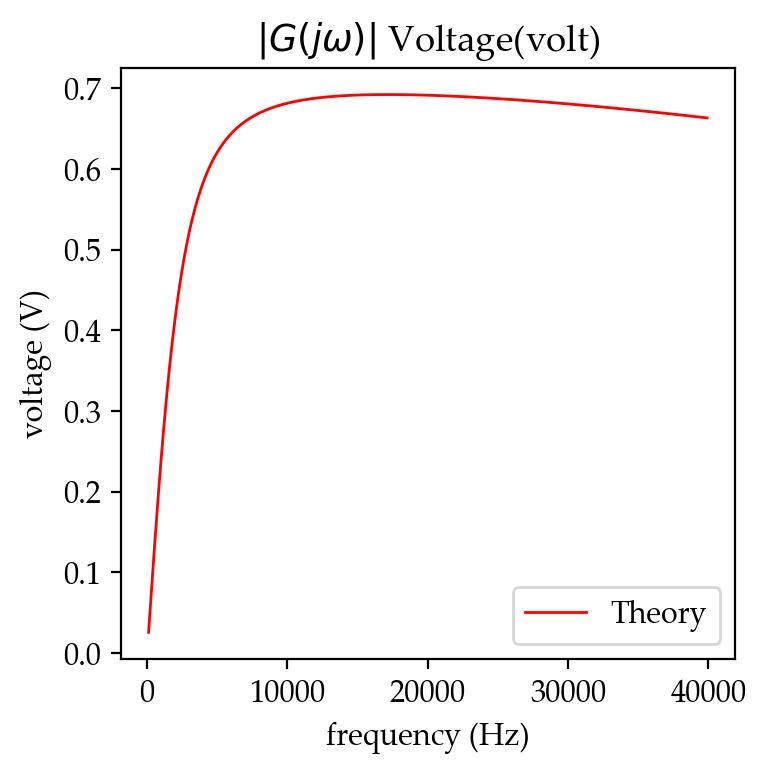

In [85]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['font.size'] = '11'
plt.title('$|G(j\omega)|$ Voltage(volt)')
plt.xlabel('frequency (Hz)')
plt.ylabel('voltage (V)')
plt.tight_layout()
#plt.plot(x_axis,y_s_data,color='black', ls='-',linewidth=2,dashes=[6, 2],label='SPICE Simulation')
plt.plot(x_axis,y_axis,color='red',ls = '-',label='Theory',linewidth=1)
plt.legend()

### 3.1 $R_L$ Average Voltage ###

Since our circuit transfer function was known as $$\displaystyle G_{L(s)} = \frac{C M R_{L} s^{2}}{R_{2} + R_{L} + s^{3} \left(C L_{1} L_{2} - C M^{2}\right) + s^{2} \left(C L_{1} R_{2} + C L_{1} R_{L} + C L_{2} R_{1} + C L_{2} R_{S}\right) + s \left(C R_{1} R_{2} + C R_{1} R_{L} + C R_{2} R_{S} + C R_{L} R_{S} + L_{2}\right)}$$ we will put above formula in the steady state equation in:
$$y_{ss}\left(f\right)\left(t\right)= \sum_{n=-N}^N{G_{LS}\left(jn\omega\right)\gamma_n(f)e^{jn\omega t}}$$
where:
$$\displaystyle \gamma_n = \frac{1}{T} \int_{t_0}^{t_0 + T} u(t) e^{-jn\omega t}{d}t$$

We are going to calculate by using sine wave voltage: 

$$u(t)=u_0 sin(\omega t)$$

and we can simplifed the calculation of the steady state output voltage($y_{ss}$) into:

$$x(t)=e^{A(t-t_0)}x(t_0)+\int_{t_0}^{t}Bu(p)dp$$

$$y_{ss(t)}=u_0|G(j\omega)|sin(\omega{t}+\angle G(j\omega)$$

we will also able to calculate the steady state output power ($p_{ss}$) in the $R_L$ using:

$$p_{ss(t)}=\frac{y_{ss(t)}^2}{R_L}$$
$$p_{ss}=\frac{1}{T}\int_{t_0}^{t_0+T} \frac{y_{ss(t)}^2}{R_L} {dt}$$
$$p_{ss}=\frac{|G(j\omega)|^2}{2R_LT}\int_{t_0}^{t_0+T}(1-cos2(\omega t+\angle G(j\omega){dt}$$
$$p_{ss}=\frac{|G(j\omega)|^2}{2R_LT}$$

Based on the average power formula $p_{ss}$ we can obtain higher average power by optimize the $|G(j\omega)|^2$ 

In [77]:
display(GLSe.as_eq())

Eq(G_L(s), M*R_L*s/(R_1*R_2 + R_1*R_L + R_2*R_S + R_L*R_S + s**2*(L_1*L_2 - M**2) + s*(L_1*R_2 + L_1*R_L + L_2*R_1 + L_2*R_S)))

### Experiment 2 - $y_{ss(t)}$ Average $R_L$ Voltage ###

In [78]:
freq = 100e3
t,n,T = sp.symbols('t,n,T')
omegav = (2*np.pi)*freq
period = (2*np.pi)/omegav
TF         = GLSe  
TF_value   = sb.named_expression("G_{L(s)}",TF.subs([(L1,L1v),(L2,L2v),(M,Mv),(RS,RSv),(RL,RLv),(R1,R1v),(R2,R2v)]))
display(TF_value.as_eq())

Eq(G_{L(s)}, 0.0009*s/(1.9e-9*s**2 + 0.0013*s + 22))

In [79]:
## Phase Calculation ##
TF_jwov       = sb.named_expression("G_{L(jn\omega)}",TF_value.subs(s,1j*2*np.pi*freq))
(re_part, im_part) = TF_jwov.expand(complex=True).as_real_imag()
TF_phase = sp.atan(im_part/ re_part)
print("TF Magnitude:",TF_jwov,"TF Phase:",TF_phase)
t0=0
yss = sp.Abs(TF_jwov)*sin(omegav*t+TF_phase)
pss = (yss**2)/(RLv)
yss_lmd = sp.lambdify(t,yss)
pss_lmd = sp.lambdify(t,pss)
print('yss:',yss,'\n pss:',pss)

TF Magnitude: 0.000472301493664274*I*(-728.089934482791 - 816.814089933346*I) TF Phase: -0.728030972652328
yss: 0.516798028730306*sin(628318.530717959*t - 0.728030972652328) 
 pss: 0.026708020249953*sin(628318.530717959*t - 0.728030972652328)**2


In [80]:
x_axis   = np.arange(0, 1e-4, 1e-6)
y_axis   = np.array([yss_lmd(i) for i in x_axis])

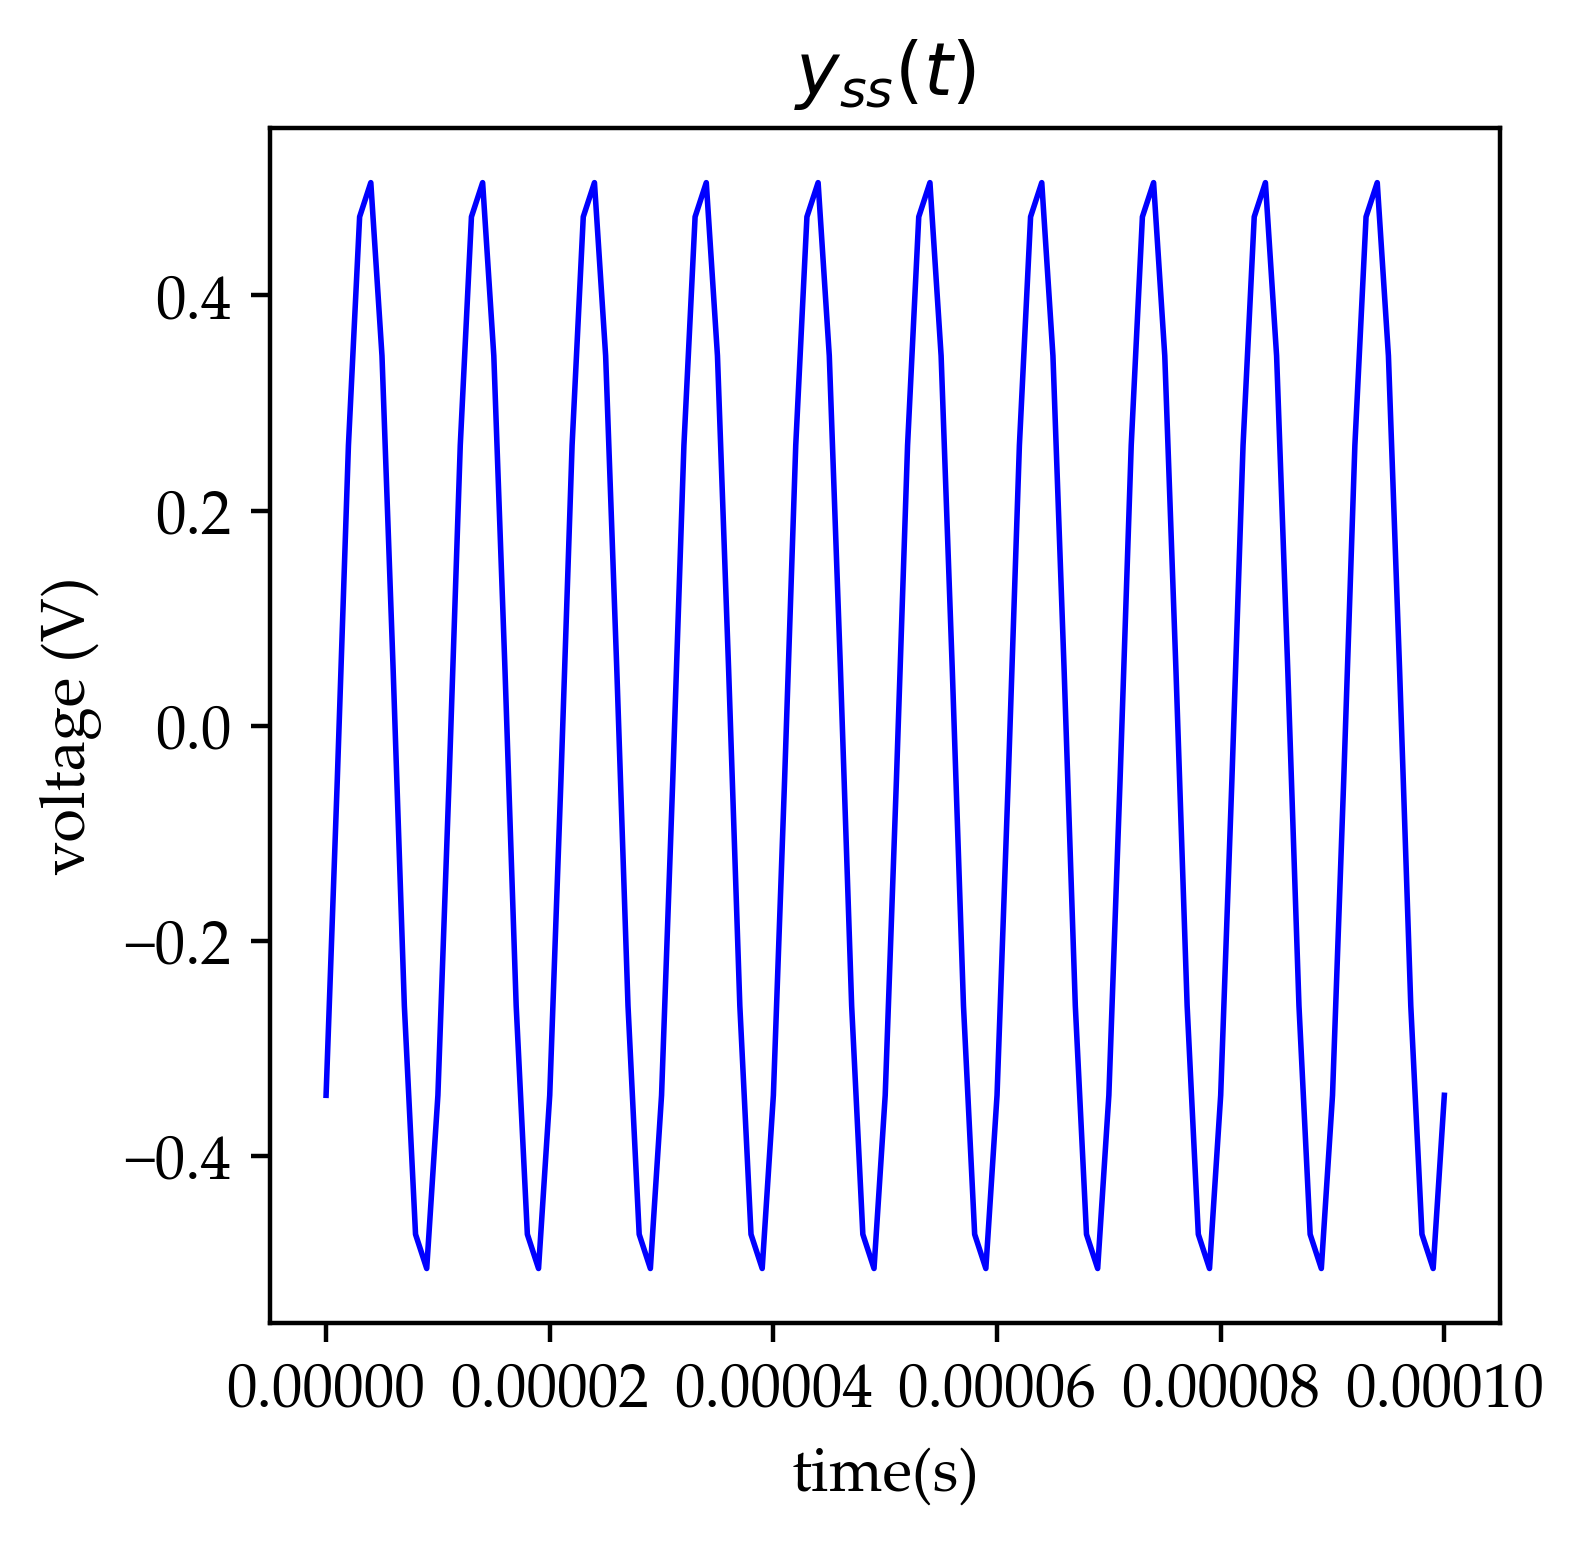

In [81]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 400 # 200 e.g. is really fine, but slower
plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['font.size'] = '11'
plt.title('$y_{ss}(t)$')
plt.xlabel('time(s)')
plt.ylabel('voltage (V)')
plt.tight_layout()
# ---plot LTSPICE simulation---
#plt.plot(x_axis_2,y_s_data_2,color='black', ls='-',linewidth=2, dashes=[1, 1],label='SPICE Simulation')
# ---plot calculation---
plt.plot(x_axis,y_axis,color='blue',ls = '-',linewidth=1)
#---file save---
#plt.legend(loc='lower right')
plt.savefig('img/figure-5a.png')